https://zhining.tistory.com/4

In [26]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

  (1) 데이터 훑어보기  

1. 데이터 로딩 : csv 파일을 데이터프레임으로 읽기 
2. 학습 데이터 셋의 상위 5개 항목 출력  
3. 학습 데이터 셋의 각 필드 데이터 분포(평균, 최소값, 최대값 등)를 살펴보기 
4. 각 컬럼의 데이터 타입 확인하기 
5. 'Cabin'필드에는 어떤 값이 있는지 확인하기   => unique 사용
6. 생존한 사람, 사망한 사람의 수 확인하기 
7. 각 클래스('Pclass')별 탑승객 분포 확인하기 
8. 성('Sex')별 탑승객 분표 확인하기 
9. 탑승 위치('Embarked') 별 탑승객 분표 확인하기 

In [27]:
df = pd.read_csv('datasets/titanic_train.csv')

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
df.info()

# 타입 변환할때는 astype 쓰면 된다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [32]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [33]:
df['Pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [34]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [35]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

 (2) 데이터 전처리  

1. null값 체크 
2. 결측치 처리(1) : 'Embarked' 필드의 결측치는 값이 가장 많은 'S'로 할당하기 
3. 결측치 처리(2) : 'Age' 필드의 결측치는 값이 중간값으로 할당하기 
4. 'Name'필드에서 신분을 나타내는 단어를 뽑아서 'Title' 필드에 할당하기  
   (힌트1) :  '.'을 기준으로 앞에 위치하는 문자열을 추출  
   (힌트2):   train['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

5.

'Title' 필드의 카테고리를 6개의 항목으로 변경하기

'Officer': 'Capt', 'Col', 'Major', 'Dr', 'Rev'
'Master' : 'Jonkheer', 'Master'
'Royalty' : 'Don', 'Sir', 'the Countess', 'Lady', 'Dona'
'Mrs' : 'Mme', 'Ms', 'Mrs'
'Miss': 'Mlle', 'Miss'
'Mr' : 'Mr'

6.변수 y를 선언해서 학습할 목표변수(=종속변수)인 'Survived'필드값을 담기

7.나이('Age') 필드를 그룹핑하여 'AgeGroup'필드 생성하여 할당하기

- 0~18세: Baby
- 19~25세: Youth
- 26~35세: YoungAdult
- 36~60세: MiddleAged
- 61~100세: Senior

8. 'AgeGroup'이 'Baby'인 raw만 출력하기

In [36]:
#2-1
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [37]:
#2-2
df['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [39]:
#2-3
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean"), inplace=True)

In [57]:
#2-4'Name'필드에서 신분을 나타내는 단어를 뽑아서 'Title' 필드에 할당하기
#(힌트1) : '.'을 기준으로 앞에 위치하는 문자열을 추출
#힌트2): train['Name'].str.extract(' ([A-Za-z]+).', expand = False)


df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)


df['Title'].unique().tolist()


['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [41]:
y = df['Survived']

In [42]:
bins = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins, labels=group_names)
df['AgeGroup'].value_counts()

YoungAdult    373
MiddleAged    195
Youth         162
Baby          139
Senior         22
Name: AgeGroup, dtype: int64

In [43]:
df[df['AgeGroup']=='Baby']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,Baby
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Baby
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss,Baby
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,Miss,Baby
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,Master,Baby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,Miss,Baby
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,Miss,Baby
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,Mrs,Baby
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,Master,Baby


 (3) 데이터 시각화  

0. 라이브러리 import 
1. 학습 데이터셋(train)의 데이터 분포확인하기  
   (힌트) 히스토그램 그리기, bins = 20 
2. 성별('Sex')의 생존여부('Survived') 데이터 분포확인하기 : barplot 
3. 탑승 클래스('Pclass')별 + 성별('Sex')  생존여부('Survived') 데이터 분포확인하기 : barplot  
4. 전체 변수의 correlation에 대해 히트맵 그리기 
5, 연령분포('AgeGroup')별 + 클래스('Pclass')별   생존여부('Survived') 데이터 분포확인하기: barplot 
6. 형제/자매수(''SibSp")별  + 클래스('Pclass') 별 생존여부("Survived") 

In [44]:
import seaborn as sns
import matplotlib.pylab as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAA8676BC8>,
      dtype=object)

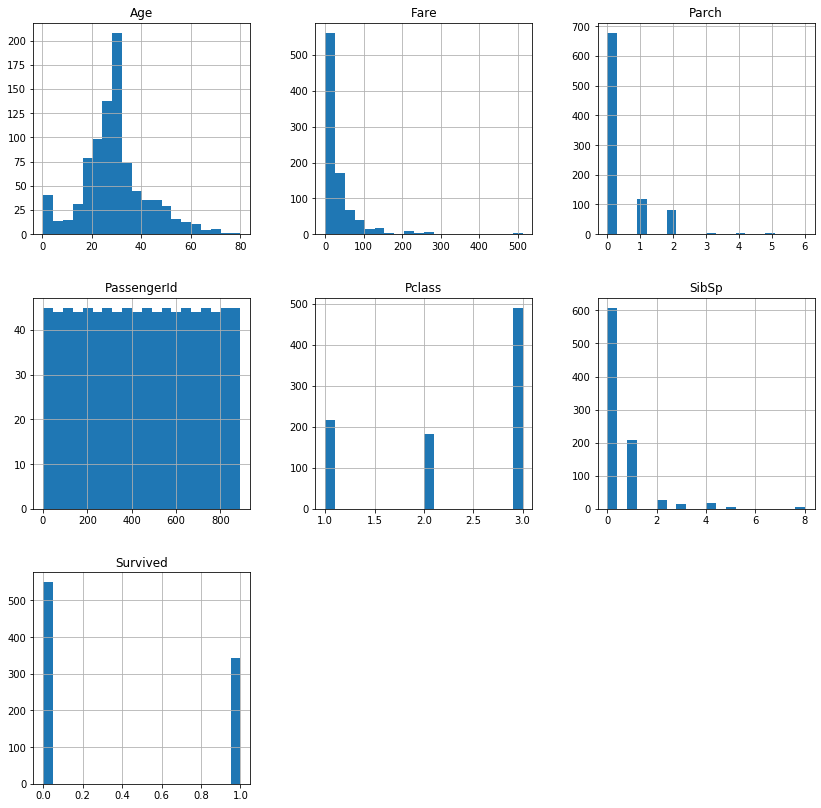

In [45]:
df.hist(figsize=(14,14), bins=20)

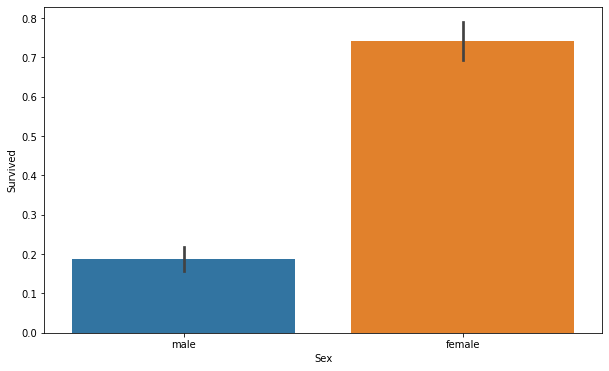

In [46]:
sns.barplot(x="Sex", y="Survived", data=df)

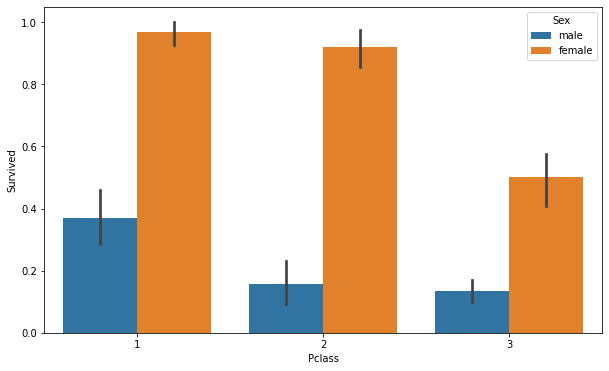

In [47]:
sns.barplot(x="Pclass", y="Survived", hue ='Sex', data=df)

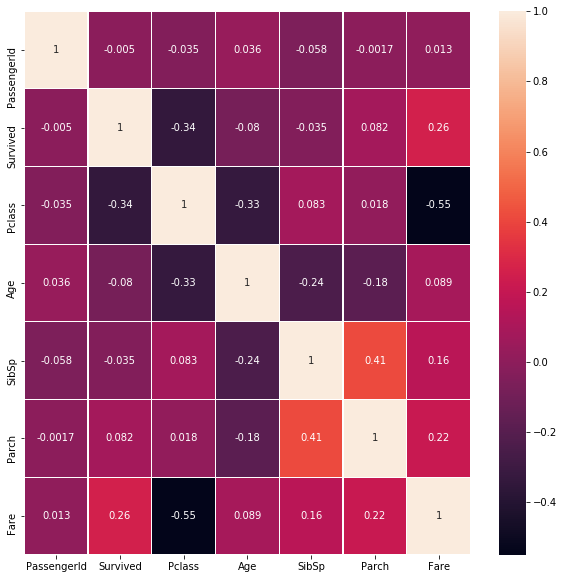

In [48]:
# 전체 변수의 correlation에 대해 히트맵 그리기
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.2)

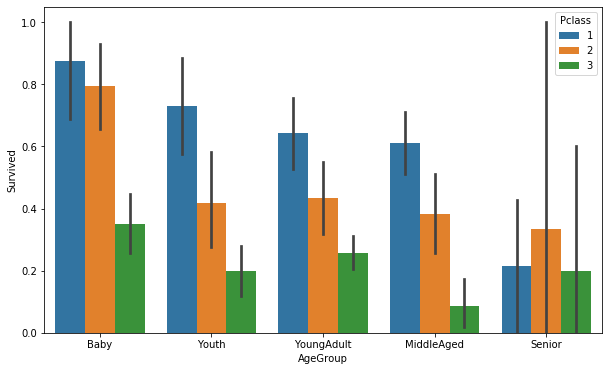

In [49]:
sns.barplot(x="AgeGroup", y="Survived", hue ='Pclass', data=df)

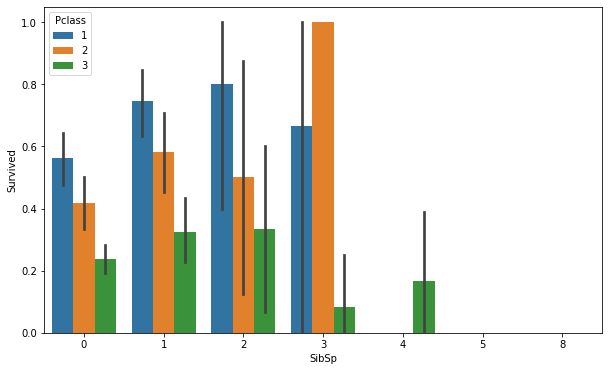

In [50]:
sns.barplot(x="SibSp", y="Survived",hue ='Pclass', data=df)

### 다른 사람들은 타이타닉 분석을 어떻게 했을까?
https://velog.io/@skyepodium/kaggle-%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89-%EC%83%9D%EC%A1%B4%EC%9E%90-%EC%98%88%EC%B8%A1


https://lsjsj92.tistory.com/426

In [51]:
#문자열을 그대로 가지고 있으면 모델을 못돌린다. 숫자로 바꿔준다.
sex_mapping = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(sex_mapping)

In [55]:
# null값을 확인할 떄, age가 null이 상당히 많았다. 그냥 일반적으로 null값을 나이 평균값으로 
# 내기에는 어린 사람은 0t살, 많은 사람은 80살까지 있기 때문에 뭔가 부족하다.
# 그래서 이 Mr, Miss 등의 평균값을 이용하는 것이다
df.groupby('Title')['Age'].mean()

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          40.389521
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       7.189414
Miss        22.988822
Mlle        24.000000
Mme         24.000000
Mr          31.990272
Mrs         34.812536
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [65]:
sns.catplot(x= 'Pclass', y='Survived',hue ='Sex', col = 'Embarked', df=df)

plt.show()  # 이 오류는 왜 뜨는 것일까?

ValueError: Could not interpret input 'Pclass'

In [63]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64